# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# ====== Count 'unknown' placeholders ======
unknown_counts = (df == "unknown").sum().sort_values(ascending=False)
unknown_counts = unknown_counts[unknown_counts > 0]
unknown_counts.head(15)

default      8597
education    1731
housing       990
loan          990
job           330
marital        80
dtype: int64

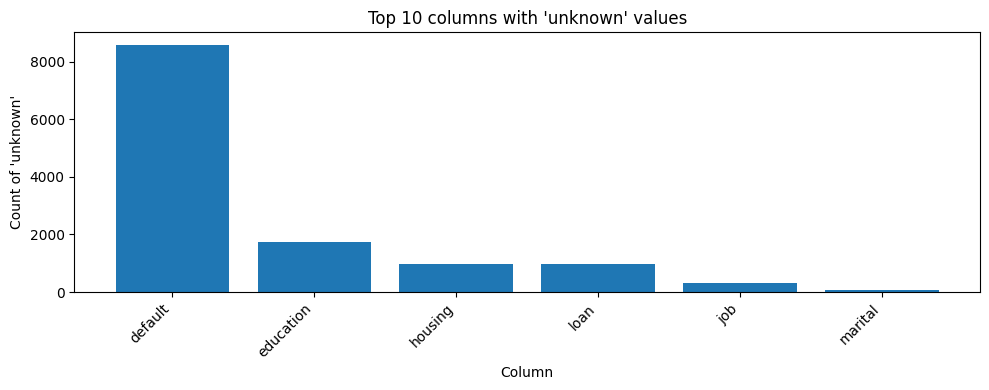

In [6]:
# ====== Plot 'unknown' counts (top 10) ======
top = unknown_counts.head(10)

plt.figure(figsize=(10, 4))
plt.bar(top.index.astype(str), top.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Column")
plt.ylabel("Count of 'unknown'")
plt.title("Top 10 columns with 'unknown' values")
plt.tight_layout()
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
# ====== Target Distribution (Imbalance) ======
target_prop = df["y"].value_counts(normalize=True)
target_prop

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

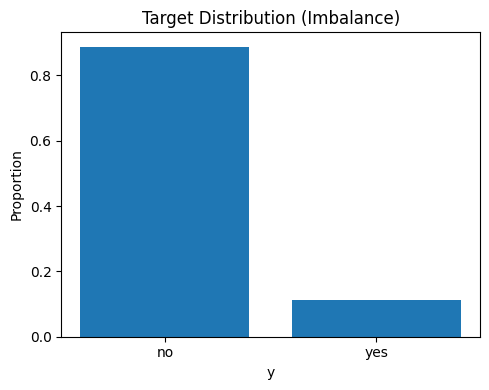

In [8]:
# ====== Plot Target Distribution ======
plt.figure(figsize=(5, 4))
plt.bar(target_prop.index.astype(str), target_prop.values)
plt.xlabel("y")
plt.ylabel("Proportion")
plt.title("Target Distribution (Imbalance)")
plt.tight_layout()
plt.show()


In [9]:
# ====== Drop Leakage Feature + Create X and y ======
if "duration" in df.columns:
    df = df.drop(columns=["duration"])

X = df.drop(columns=["y"])
y = (df["y"] == "yes").astype(int)

X.shape, y.mean()

((41188, 19), np.float64(0.11265417111780131))

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
# ====== Train/Test Split ======
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((30891, 19),
 (10297, 19),
 np.float64(0.11265417111780131),
 np.float64(0.11265417111780131))

In [11]:
# ====== Descriptive Statistics for Numeric Columns ======
X_train.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
age,30891.0,40.011589,10.401138,17.000,32.000,38.000,47.000,98.000
campaign,30891.0,2.561361,2.753381,1.000,1.000,2.000,3.000,56.000
pdays,30891.0,961.583633,189.091162,0.000,999.000,999.000,999.000,999.000
previous,30891.0,0.175650,0.500208,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30891.0,0.080386,1.571478,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30891.0,93.575119,0.578795,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,30891.0,-40.505872,4.629710,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30891.0,3.617182,1.736792,0.634,1.344,4.857,4.961,5.045
nr.employed,30891.0,5166.864171,72.449555,4963.600,5099.100,5191.000,5228.100,5228.100


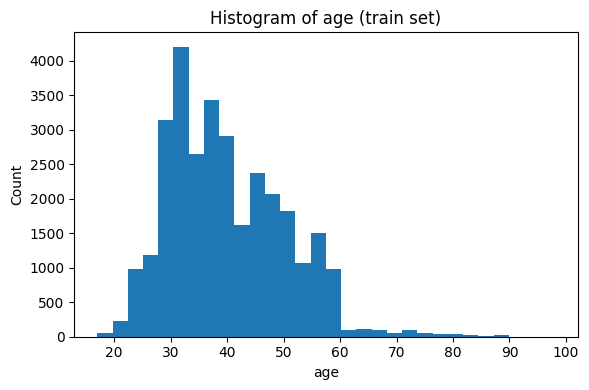

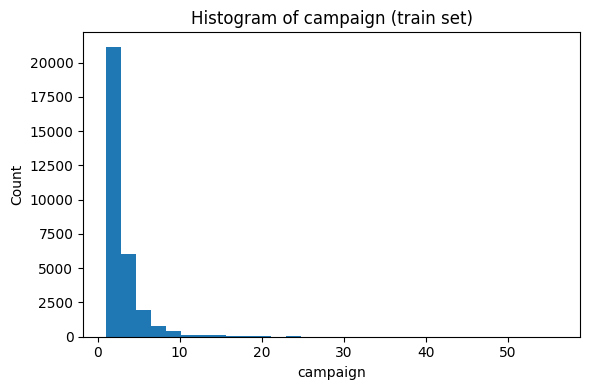

In [12]:
# ====== Example Numeric Distributions (Histogram) ======
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

to_plot = [c for c in ["age", "campaign", "euribor3m", "nr.employed"] if c in numeric_cols]
to_plot = to_plot[:2]

for col in to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(X_train[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Histogram of {col} (train set)")
    plt.tight_layout()
    plt.show()


In [13]:
# ====== Preprocessing (Scaling + One-Hot Encoding) ======
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

len(num_cols), len(cat_cols), num_cols[:5], cat_cols[:5]

(9,
 10,
 ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate'],
 ['job', 'marital', 'education', 'default', 'housing'])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# ====== Baseline Model (DummyClassifier) ======
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

baseline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", DummyClassifier(strategy="most_frequent"))
])

baseline_cv = cross_validate(
    baseline, X_train, y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1
)

{m: baseline_cv[f"test_{m}"].mean() for m in scoring}

/Users/E517276/.local/pipx/venvs/notebook/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/E517276/.local/pipx/venvs/notebook/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/E517276/.local/pipx/venvs/notebook/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

{'accuracy': np.float64(0.8873458284100257),
 'precision': np.float64(0.0),
 'recall': np.float64(0.0),
 'f1': np.float64(0.0),
 'roc_auc': np.float64(0.5)}

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
# ====== Define Models ======
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True)
}

models

{'KNN': KNeighborsClassifier(n_neighbors=15),
 'Logistic Regression': LogisticRegression(max_iter=2000),
 'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
 'SVM (RBF)': SVC(probability=True)}

In [16]:
# ====== Cross-Validation Comparison ======
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    cv = cross_validate(
        pipe, X_train, y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1
    )
    row = {"model": name}
    for m in scoring:
        row[m] = cv[f"test_{m}"].mean()
    row["fit_time"] = cv["fit_time"].mean()
    results.append(row)

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
results_df

,model,accuracy,precision,recall,f1,roc_auc,fit_time
1,Logistic Regression,0.898870,0.647730,0.225000,0.333855,0.787443,0.135510
2,Decision Tree,0.898223,0.615341,0.257759,0.362989,0.781598,0.088044
0,KNN,0.897122,0.605941,0.250575,0.354171,0.751225,0.040541
3,SVM (RBF),0.899453,0.643606,0.241667,0.351114,0.699294,162.276830


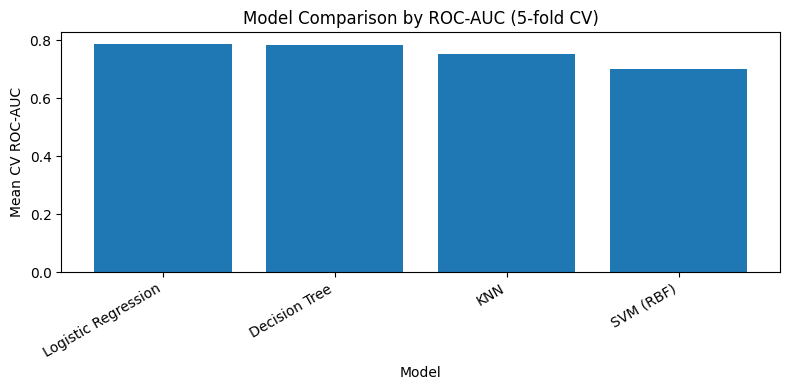

In [17]:
# ====== Plot Model ROC-AUC (CV mean) ======
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["roc_auc"])
plt.xticks(rotation=30, ha="right")
plt.xlabel("Model")
plt.ylabel("Mean CV ROC-AUC")
plt.title("Model Comparison by ROC-AUC (5-fold CV)")
plt.tight_layout()
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
# ====== Train Best Model on Full Training Data ======
best_name = results_df.iloc[0]["model"]
best_model = models[best_name]

best_pipe = Pipeline(steps=[("prep", preprocess), ("model", best_model)])
best_pipe.fit(X_train, y_train)

best_name


'Logistic Regression'

In [19]:
# ====== Test Set Evaluation ======
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_proba)
print("Best model:", best_name)
print("Test ROC-AUC:", test_auc)
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


Best model: Logistic Regression
Test ROC-AUC: 0.8052499216901344

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9137
           1       0.70      0.22      0.33      1160

    accuracy                           0.90     10297
   macro avg       0.80      0.60      0.64     10297
weighted avg       0.89      0.90      0.88     10297



array([[9029,  108],
       [ 907,  253]])

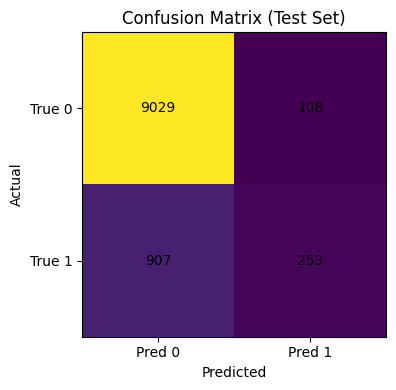

In [20]:
# ====== Confusion Matrix Plot ======
plt.figure(figsize=(4.5, 4))
plt.imshow(cm)
plt.xticks([0, 1], ["Pred 0", "Pred 1"])
plt.yticks([0, 1], ["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.tight_layout()
plt.show()

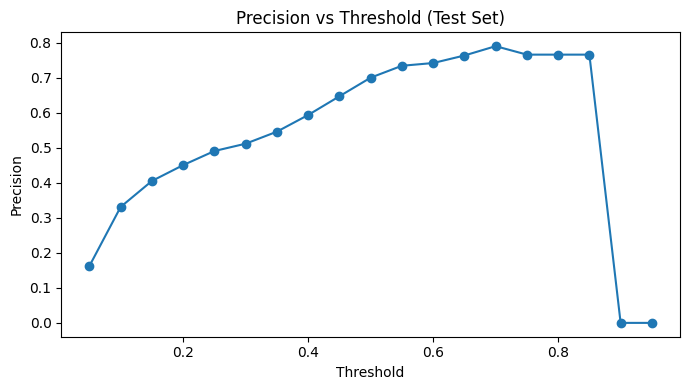

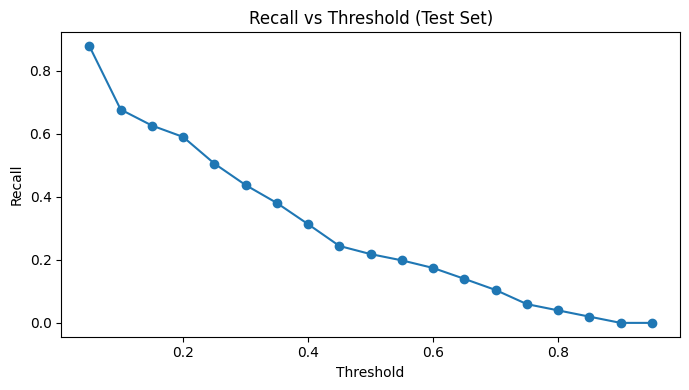

In [21]:
# ====== Threshold Analysis (Precision/Recall vs Threshold) ======
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0.05, 0.95, 19)
precisions = []
recalls = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, preds, zero_division=0))
    recalls.append(recall_score(y_test, preds, zero_division=0))

plt.figure(figsize=(7, 4))
plt.plot(thresholds, precisions, marker="o")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision vs Threshold (Test Set)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(thresholds, recalls, marker="o")
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold (Test Set)")
plt.tight_layout()
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
import time
from sklearn.metrics import accuracy_score

results = []

for name, model in models.items():
    # Create pipeline with preprocessing
    pipe = Pipeline([
        ("prep", preprocess),
        ("model", model)
    ])
    
    # Measure training time
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()
    
    train_time = end - start
    
    # Training accuracy
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    
    # Test accuracy
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    
    results.append([name, train_time, train_acc, test_acc])

# Create DataFrame
comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"]
)

comparison_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.070123,0.903370,0.899680
1,Logistic Regression,0.128250,0.899647,0.901428
2,Decision Tree,0.087160,0.905150,0.901428
3,SVM (RBF),108.894402,0.904794,0.903467


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# ====== Light Hyperparameter Tuning (GridSearchCV) ======
from sklearn.model_selection import GridSearchCV

param_grids = {
    "KNN": {"model__n_neighbors": [5, 10, 15, 25]},
    "Logistic Regression": {"model__C": [0.1, 1.0, 3.0]},
    "Decision Tree": {"model__max_depth": [3, 6, 10], "model__min_samples_leaf": [1, 10, 30]},
    "SVM (RBF)": {"model__C": [0.5, 1.0, 3.0], "model__gamma": ["scale", 0.01, 0.1]},
}

tuned = []
best_estimators = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    tuned.append({"model": name, "best_cv_auc": grid.best_score_, "best_params": grid.best_params_})
    best_estimators[name] = grid.best_estimator_

tuned_df = pd.DataFrame(tuned).sort_values("best_cv_auc", ascending=False)
tuned_df


In [ ]:
# ====== Evaluate Best Tuned Model on Test Set ======
from sklearn.metrics import roc_auc_score, classification_report

best_tuned_name = tuned_df.iloc[0]["model"]
best_tuned_pipe = best_estimators[best_tuned_name]

y_pred_tuned = best_tuned_pipe.predict(X_test)
y_proba_tuned = best_tuned_pipe.predict_proba(X_test)[:, 1]

print("Best tuned model:", best_tuned_name)
print("Test ROC-AUC (tuned):", roc_auc_score(y_test, y_proba_tuned))
print("\nClassification report (tuned):\n", classification_report(y_test, y_pred_tuned))

## Findings and Recommendations

- The data is **imbalanced**, so ROC-AUC and the precision/recall tradeoff are important.
- Proper preprocessing (**scaling + one-hot encoding**) is essential, especially for KNN and SVM.
- Use model probabilities to **rank customers** and call the top segment (e.g., top 10%).

### Next steps
- Choose an operating threshold based on call budget (precision vs recall).
- Consider probability calibration for better ranking decisions.
- Try ensembles in later modules if allowed (Random Forest / Gradient Boosting).
